Worked on 11/16/21
By Alex

# EDA

In [1]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

seed = 42

In [2]:
#read in data
df = pd.read_csv('../../data/judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')

In [3]:
#reviewing import
df.head()

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

In [4]:
df.shape

(9093, 3)

In [5]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [6]:
df.describe()

tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique                               9   
top                               iPad   
freq                               946   

       is_there_an_emotion_directed_at_a_brand_or_product  
count                                                9093  
unique                                                  4  
top                    No emotion toward brand or product  
freq                                                 5389

Noting that there are 9092 tweets in the dataset, but only 9065 are 'unique'. This means there are some duplicate tweets in the dataset that may need to be dropped. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


There are quite a few nulls in the product/brand the emotion is directed to.

## Emotions 
Target variable exploration

In [8]:
emotions = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts(normalize=True)
emotions

No emotion toward brand or product    0.592654
Positive emotion                      0.327505
Negative emotion                      0.062686
I can't tell                          0.017156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

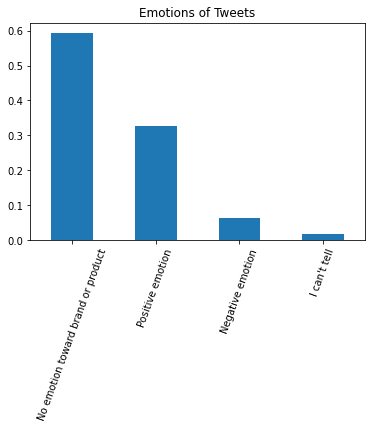

In [9]:
emotions.plot(kind='bar')
plt.title('Emotions of Tweets')
plt.xticks(rotation = 70);

There is imbalance in the emotion target varaiable. Most of the tweets approximately 59% are labeled "No emotion...", followed by "positive" (33%), "negative" (~6%), and finally "I can't tell". 

In [10]:
positive_emotions = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']

positive_emotions['tweet_text'].sample(10)

1394    I'm sorry, NOT going to the @mention party at ...
7797    Google party! #sxsw (@mention GSD&amp;M w/ 157...
5291    RT @mention #SXSW Go 1.1 for Android is LIVE i...
6910    RT @mention We're wondering how many @mention ...
6963    RT @mention Won 2nd place in Fandango karaoke....
6062    RT @mention I mean, sliced bread is great. But...
7273    Anyone know the hours on the #sxsw Apple store...
1536    @mention @mention  @mention #sxsw just tried o...
2042    Does the apple pop-up store still have iPads? ...
127               I can haz #iPad2 ifrom #SxSW Gr8 {link}
Name: tweet_text, dtype: object

In [11]:
negative_emotions = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']

negative_emotions['tweet_text'].sample(10)

8098    #SXSW: Mistakes Made Building Netflix for iPho...
7222    But are your phones staying charged? My crappy...
8073    Google possibly  launching a social media serv...
2913    What happened to the Taxi Magic iPhone app? No...
3598    It is ridiculous to see someone taking a photo...
5660    RT @mention Deleting the #sxsw iPhone app!  {l...
2830    Just walked past the supposed #Apple #SxSW tem...
7680    Google (tries again) to launch a new social ne...
4095    &quot;Apple likes it if you pay them. That's w...
5303    RT @mention #sxsw ipad store sold out of every...
Name: tweet_text, dtype: object

In [12]:
unsure_emotions = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'I can\'t tell']
unsure_emotions['tweet_text'].sample(10)

5926    TR @mention Google (tries again) to launch a n...
7469    Original products for 1 device is nuts. #sxsw....
4882    Anyone who was going to buy a new iPad should ...
3894    the panelist from Texas Observer called the iP...
4297    Nuts.  ÛÏ@mention @mention (via @mention #sxs...
3265    Google might launching a social network called...
1961    At the Team Android party. Can't find it on Go...
8613    Google actually does have an official death po...
2167    William Patry, google, says most authors dont ...
9032    @mention yeah, we have @mention , Google has n...
Name: tweet_text, dtype: object

## Wordcloud Attempt

In [13]:
from wordcloud import WordCloud

ValueError: could not convert string to float: '\x89÷¼ Why Are We Better Than #Google? \x89÷_ {link} \x89ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter'

## DataFrame Formatting
The data frame is very wordy. Updading the column names and 'emotion' labels. 

In [17]:
#renaming columns
df.columns = ['tweet', 'product', 'emotion']
df.columns

Index(['tweet', 'product', 'emotion'], dtype='object')

In [18]:
#changing the emotion lables so it isn't so wordy

new_emotions = ['None', 'Positive', 'Negative', 'Unsure']

new_emotions_dict = dict(zip(emotions.index, new_emotions))
new_emotions_dict

{'No emotion toward brand or product': 'None',
 'Positive emotion': 'Positive',
 'Negative emotion': 'Negative',
 "I can't tell": 'Unsure'}

In [19]:
#renaming the emotion language
df['emotion'] = df['emotion'].replace(new_emotions_dict)

## Brand/Product Exploration
Exploring 'product' column which was originally the  'emotion_in_tweet_is_directed_at' column. Questions to explore:
* What items were reviewed?
* Is there a relationship between items and rating? 

In [20]:
df['product'].isna().sum()

5802

There are 5,802 nulls in this columns. Most tweets do not have an product or brand that they are postively or negatively reacting to.

In [21]:
df['product'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: product, dtype: int64

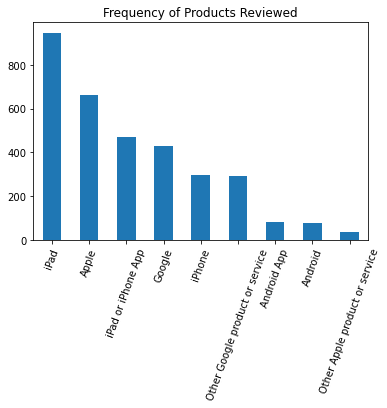

In [22]:
df['product'].value_counts().plot(kind='bar')
plt.title('Frequency of Products Reviewed')
plt.xticks(rotation = 70);

Of the items that the emotion was direct towards, most were iPads. The top three times with emotions are all related to Apple (iPad, Apple, iPad or iPhone App). 

In [23]:
df['product'].fillna('NA', inplace=True)

By adding a label in 'NA' we can compare the emotion repsonese with those that are labeled. 

In [24]:
df['product'].value_counts()

NA                                 5802
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: product, dtype: int64

In [25]:
product_list = df['product'].value_counts().index
len(product_list)

10

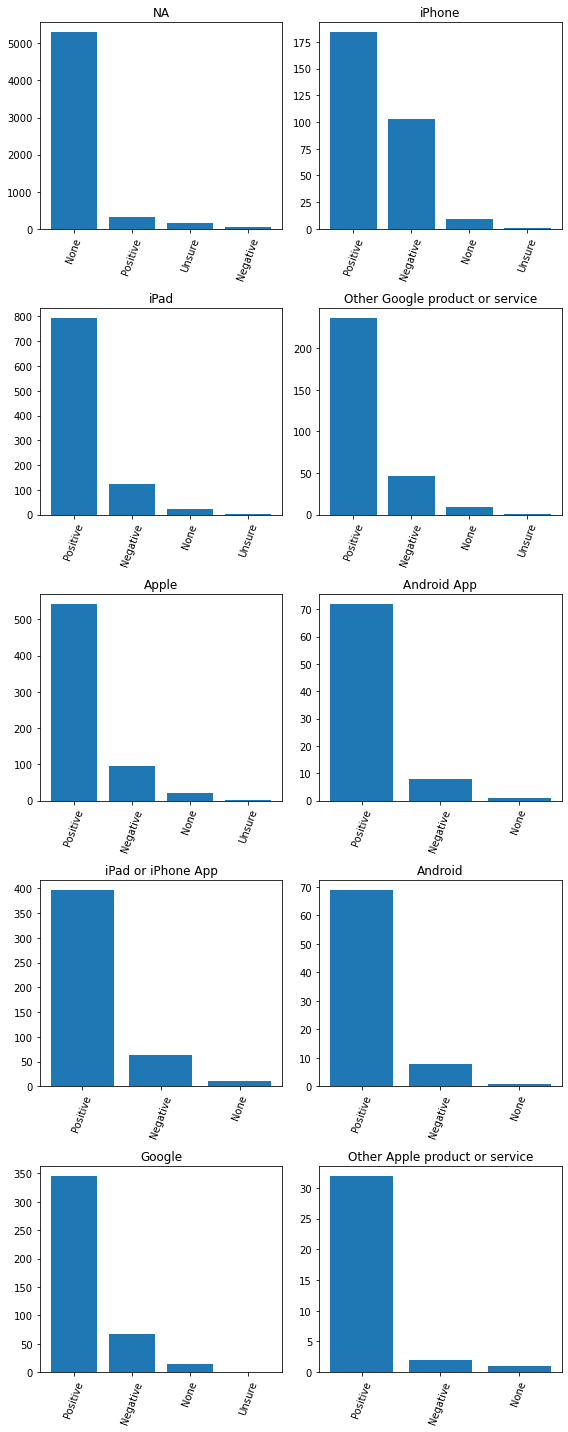

In [26]:
fig, ax = plt.subplots(nrows=(len(product_list)//2), ncols=2, figsize=(8,20))

for n, item in enumerate(product_list):
    
    #establish column and row numbers
    if n<(len(product_list)//2): 
        c = 0
    else: 
        c = 1
    
    if c == 1:
        n = n - 5
    
    #product emotions
    item_df = df.loc[df['product']== item]
    item_emotion = item_df['emotion'].value_counts()
    
    
    #plot graphs
    ax[n,c].bar(item_emotion.index, item_emotion)
    ax[n,c].set_title(item)
    ax[n,c].tick_params(axis='x', labelrotation=70)

plt.tight_layout();

If an emotion was directed towards a brand or product most of the time it was a positive emotion. When tweets were not directed towards a product or a brand, then then tweets were also not associated with a particular emotion. 

**Compare tweets by brand/product**
Graph the emotions by percentage and use the same y-axis for all graphs. 

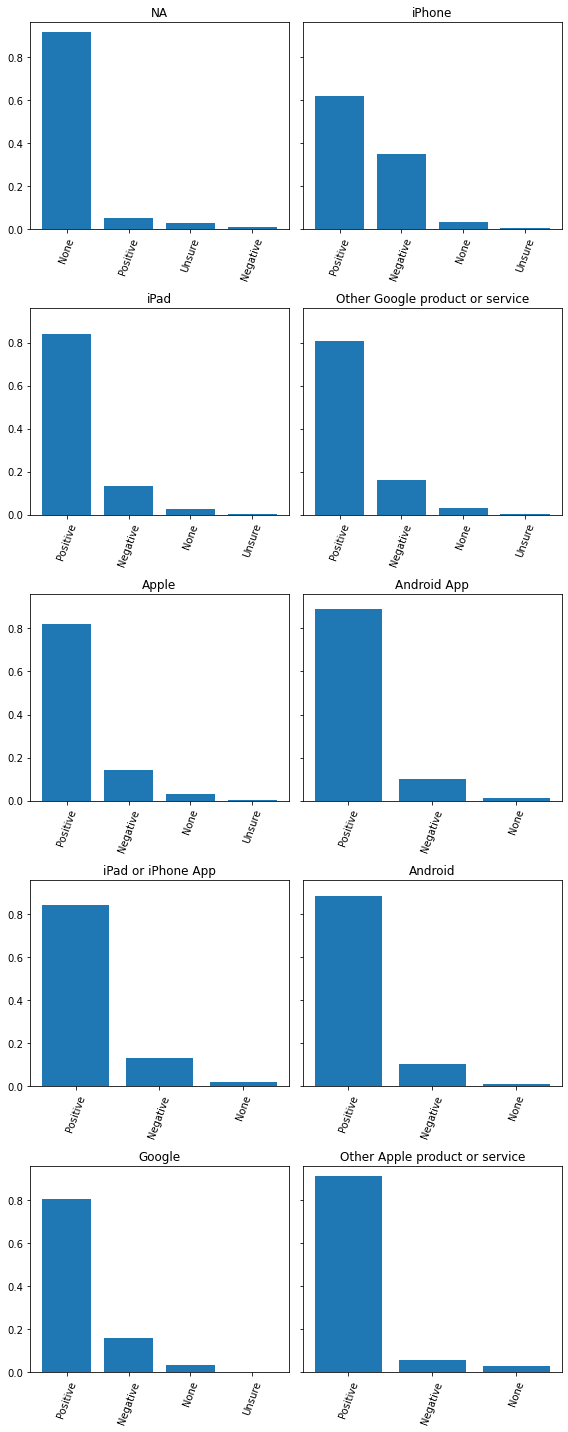

In [27]:
fig, ax = plt.subplots(nrows=(len(product_list)//2), ncols=2, sharey=True, figsize=(8,20))

for n, item in enumerate(product_list):
    
    #establish column and row numbers
    if n<(len(product_list)//2): 
        c = 0
    else: 
        c = 1
    
    if c == 1:
        n = n - 5
    
    #item product ratings
    item_df = df.loc[df['product']== item]
    item_emotion = item_df['emotion'].value_counts(normalize=True)
    
    
    #plot graphs
    ax[n,c].bar(item_emotion.index, item_emotion)
    ax[n,c].set_title(item)
    ax[n,c].tick_params(axis='x', labelrotation=70)

plt.tight_layout();

After normalizing and sharing y-axis, iPhones have the highest ratio of negative emotions in the relationship between positive and negative emotions. 

In [28]:
brand = ['NA', 'Apple', 'Apple', 'Apple', 'Google', 'Apple', 'Google', 'Google', 'Google', 'Apple']

product_brand = dict(zip(product_list, brand))
product_brand

{'NA': 'NA',
 'iPad': 'Apple',
 'Apple': 'Apple',
 'iPad or iPhone App': 'Apple',
 'Google': 'Google',
 'iPhone': 'Apple',
 'Other Google product or service': 'Google',
 'Android App': 'Google',
 'Android': 'Google',
 'Other Apple product or service': 'Apple'}

In [29]:
df['brand'] = df['product'].replace(product_brand)

Apple
Positive    0.809049
Negative    0.161063
None        0.026982
Unsure      0.002906
Name: emotion, dtype: float64
Google
Positive    0.819728
Negative    0.148526
None        0.029478
Unsure      0.002268
Name: emotion, dtype: float64
NA
None        0.913133
Positive    0.052740
Unsure      0.025336
Negative    0.008790
Name: emotion, dtype: float64


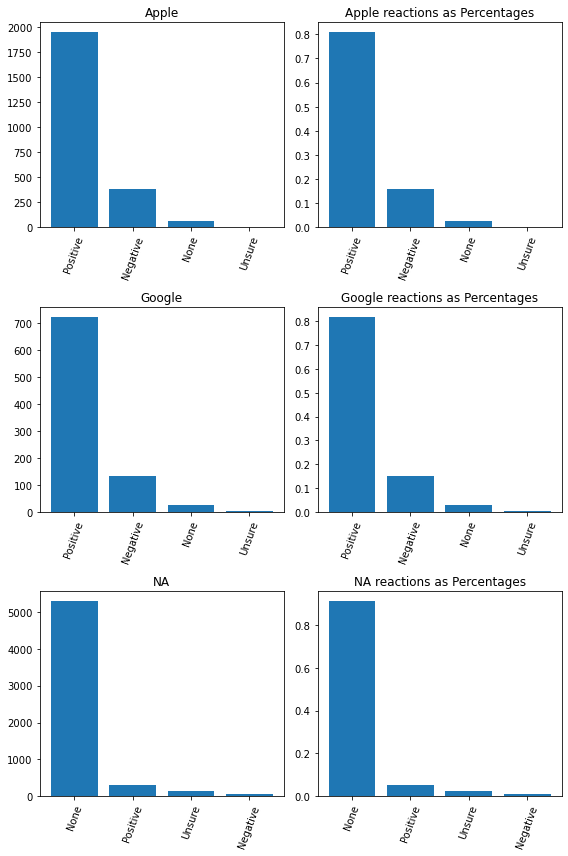

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8,12))

for n, item in enumerate(list(df['brand'].unique())):
    
    #product emotions
    item_df = df.loc[df['brand']== item]
    item_emotion = item_df['emotion'].value_counts()
    
    
    #plot graphs
    ax[n, 0].bar(item_emotion.index, item_emotion)
    ax[n, 0].set_title(item)
    ax[n, 0].tick_params(axis='x', labelrotation=70)
    
    #product emotions normalized
    item_emotion2 = item_df['emotion'].value_counts(normalize=True)
    
    ax[n, 1].bar(item_emotion2.index, item_emotion2)
    ax[n, 1].set_title(item +' reactions as Percentages')
    ax[n, 1].tick_params(axis='x', labelrotation=70)
    
    print(item)
    print(item_emotion2)

plt.tight_layout();

When comparing by brand. Apple has more tweets associated with their products/brands than google. They both have similar ratios of positive to negative to none emotion responses.

## Encode Categorical Data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    9092 non-null   object
 1   product  9093 non-null   object
 2   emotion  9093 non-null   object
 3   brand    9093 non-null   object
dtypes: object(4)
memory usage: 284.3+ KB


In [32]:
def create_category(column):
    df[column] = df[column].astype('category').cat.codes
    return df[column].value_counts()

In [33]:
create_category('emotion')

1    5389
2    2978
0     570
3     156
Name: emotion, dtype: int64

**Emotion Categorical Encoding Key:**

0. Negative, "Negative emotion" 
1. None, "No emotion toward brand or product"
2. Positive, "Positive emotion"
3. Unsure, "I can't tell"

In [34]:
create_category('brand')

2    5802
0    2409
1     882
Name: brand, dtype: int64

**Brand Categorical Encoding Key:**

0. Apple
1. Google
2. None

In [35]:
create_category('product')

4    5802
7     946
2     661
8     470
3     430
9     297
6     293
1      81
0      78
5      35
Name: product, dtype: int64

**Product Categorical Encoding Key**

4. NA                                 (5802)
7. iPad                               (946) 
2. Apple                               (661)
8. iPad or iPhone App                  (470)
3. Google                              (430)
9. iPhone                              (297)
6. Other Google product or service     (293)
1. Android App                          (81)
0. Android                              (78)
5. Other Apple product or service       (35)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    9092 non-null   object
 1   product  9093 non-null   int8  
 2   emotion  9093 non-null   int8  
 3   brand    9093 non-null   int8  
dtypes: int8(3), object(1)
memory usage: 97.8+ KB


In [37]:
df.head()

tweet  product  emotion  brand
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...        9        0      0
1  @jessedee Know about @fludapp ? Awesome iPad/i...        8        2      0
2  @swonderlin Can not wait for #iPad 2 also. The...        7        2      0
3  @sxsw I hope this year's festival isn't as cra...        8        0      0
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...        3        2      1

## Text Cleaning

In [39]:
text_df = df.copy()

In [40]:
# Transform sample data to lowercase
text_df["tweet"] = text_df["tweet"].str.lower()
# Display full text
text_df.style.set_properties(**{'text-align': 'left'})

In [41]:
#above df shows nan value at row 6, checking for addn'l in DF

text_df.isna().sum()

tweet      1
product    0
emotion    0
brand      0
dtype: int64

In [42]:
text_df['tweet'].dropna(axis = 0, inplace=True)

In [44]:
text_df.isna().sum()

tweet      1
product    0
emotion    0
brand      0
dtype: int64

## What stopwords to remove (and how)?  

- remove @'s and # via regex - DONE
- remove product - add to stopwords list - DONE
- remove company  = add to stopwords list - DONE
- remove emojis (first pass at least? remove or acknowledge presence? )

In EDA when companies and products are mentioned they have emotions attached to them (see above graphs).  Removing these words so model doesn't associate "Google" or "Apple" with sentiment - 'overfitting' to these words. 

In [45]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
stopwords_list[:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [46]:
# add numbers to stopwords list

numbers = [str(x) for x in list(range(10))]
numbers

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [47]:
stopwords_list += numbers

### TO DO Add product list as stopwords!! (next round)

In [42]:
product_list

Index(['NA', 'iPad', 'Apple', 'iPad or iPhone App', 'Google', 'iPhone',
       'Other Google product or service', 'Android App', 'Android',
       'Other Apple product or service'],
      dtype='object')

# Back to cleaning

In [48]:
brands = ['apple', 'google', 'android']

In [49]:
stopwords_list += brands

### Setting up regex

additional thoughts: instead of removing complete hashtag, only remove hashtag symbol keeping content of the hashtag (ex #SXSW-> sxsw)

In [50]:
import re

In [51]:
hashtag_pattern = '(\#[a-zA-Z0-9_%]*)'

In [52]:
at_pattern = '(\@[a-zA-Z0-9_%]*)'

In [53]:
punctuation_pattern = '([^\s\w])'

In [54]:
total_pattern = '(\#[a-zA-Z0-9_%]*)|(\@[a-zA-Z0-9_%]*)|([^\s\w])'

In [55]:
text_df['cleaned_tweets'] = text_df['tweet'].map(lambda x: re.sub(total_pattern, ' ', str(x)))

In [56]:
text_df

tweet  product  emotion  \
0     .@wesley83 i have a 3g iphone. after 3 hrs twe...        9        0   
1     @jessedee know about @fludapp ? awesome ipad/i...        8        2   
2     @swonderlin can not wait for #ipad 2 also. the...        7        2   
3     @sxsw i hope this year's festival isn't as cra...        8        0   
4     @sxtxstate great stuff on fri #sxsw: marissa m...        3        2   
...                                                 ...      ...      ...   
9088                      ipad everywhere. #sxsw {link}        7        2   
9089  wave, buzz... rt @mention we interrupt your re...        4        1   
9090  google's zeiger, a physician never reported po...        4        1   
9091  some verizon iphone customers complained their...        4        1   
9092  ï¡ïàü_êîò£áââ_£â_ûârt @...        4        1   

      brand                                     cleaned_tweets  
0         0     i have a 3g iphone  after 3 hrs tweeting at...  
1         0    know about     awesome ipad iphone app that ...  
2         0    can not wait for   2 also  they should sale ...  
3         0    i hope this year s festival isn t as crashy ...  
4         1    great stuff on fri    marissa mayer  google ...  
...     ...                                                ...  
9088      0                          ipad everywhere     link   
9089      2  wave  buzz    rt   we interrupt your regularly...  
9090      2  google s zeiger  a physician never reported po...  
9091      2  some verizon iphone customers complained their...  
9092      2   ï  ïà ü_  ê  î  ò     á ââ  _       â_ ûârt  ...  

[9093 rows x 5 columns]

## more stopwords

In [57]:
import string

In [58]:
stopwords_list += string.punctuation

In [59]:
text_df['cleaned_tweets'] = text_df['cleaned_tweets'].map(lambda x: x.split())

In [60]:
text_df

tweet  product  emotion  \
0     .@wesley83 i have a 3g iphone. after 3 hrs twe...        9        0   
1     @jessedee know about @fludapp ? awesome ipad/i...        8        2   
2     @swonderlin can not wait for #ipad 2 also. the...        7        2   
3     @sxsw i hope this year's festival isn't as cra...        8        0   
4     @sxtxstate great stuff on fri #sxsw: marissa m...        3        2   
...                                                 ...      ...      ...   
9088                      ipad everywhere. #sxsw {link}        7        2   
9089  wave, buzz... rt @mention we interrupt your re...        4        1   
9090  google's zeiger, a physician never reported po...        4        1   
9091  some verizon iphone customers complained their...        4        1   
9092  ï¡ïàü_êîò£áââ_£â_ûârt @...        4        1   

      brand                                     cleaned_tweets  
0         0  [i, have, a, 3g, iphone, after, 3, hrs, tweeti...  
1         0  [know, about, awesome, ipad, iphone, app, that...  
2         0  [can, not, wait, for, 2, also, they, should, s...  
3         0  [i, hope, this, year, s, festival, isn, t, as,...  
4         1  [great, stuff, on, fri, marissa, mayer, google...  
...     ...                                                ...  
9088      0                           [ipad, everywhere, link]  
9089      2  [wave, buzz, rt, we, interrupt, your, regularl...  
9090      2  [google, s, zeiger, a, physician, never, repor...  
9091      2  [some, verizon, iphone, customers, complained,...  
9092      2  [ï, ïà, ü_, ê, î, ò, á, ââ, _, â_, ûârt, googl...  

[9093 rows x 5 columns]

In [61]:
text_df['cleaned_tweets'] = text_df['cleaned_tweets'].map(lambda x: [word for word in x if word not in stopwords_list])

In [62]:
text_df

tweet  product  emotion  \
0     .@wesley83 i have a 3g iphone. after 3 hrs twe...        9        0   
1     @jessedee know about @fludapp ? awesome ipad/i...        8        2   
2     @swonderlin can not wait for #ipad 2 also. the...        7        2   
3     @sxsw i hope this year's festival isn't as cra...        8        0   
4     @sxtxstate great stuff on fri #sxsw: marissa m...        3        2   
...                                                 ...      ...      ...   
9088                      ipad everywhere. #sxsw {link}        7        2   
9089  wave, buzz... rt @mention we interrupt your re...        4        1   
9090  google's zeiger, a physician never reported po...        4        1   
9091  some verizon iphone customers complained their...        4        1   
9092  ï¡ïàü_êîò£áââ_£â_ûârt @...        4        1   

      brand                                     cleaned_tweets  
0         0  [3g, iphone, hrs, tweeting, dead, need, upgrad...  
1         0  [know, awesome, ipad, iphone, app, likely, app...  
2         0                                 [wait, also, sale]  
3         0  [hope, year, festival, crashy, year, iphone, app]  
4         1  [great, stuff, fri, marissa, mayer, tim, reill...  
...     ...                                                ...  
9088      0                           [ipad, everywhere, link]  
9089      2  [wave, buzz, rt, interrupt, regularly, schedul...  
9090      2  [zeiger, physician, never, reported, potential...  
9091      2  [verizon, iphone, customers, complained, time,...  
9092      2  [ï, ïà, ü_, ê, î, ò, á, ââ, â_, ûârt, tests, û...  

[9093 rows x 5 columns]

# Train-Test-Split

In [65]:
from sklearn.model_selection import train_test_split

X= text_df['cleaned_tweets']
y= text_df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size= 0.3)

In [66]:
X_test, X_val, y_test, y_val = train_test_split(X, y, random_state=seed, test_size= 0.2)

In [67]:
X_train

2954      [glad, standard, navigation, tools, might, one]
2709    [ready, take, tech, geekdom, whole, new, level...
2357    [panel, getting, great, start, video, surui, c...
6195    [rt, join, actsofsharing, com, tonight, person...
1366    [spread, word, festival, explorer, app, live, ...
                              ...                        
5734    [rt, many, asked, last, night, free, phone, si...
5191    [rt, quot, quot, refrigerator, magnet, game, q...
5390    [rt, developers, friends, let, hang, 12, 30p, ...
860     [geeky, love, rt, opening, temporary, store, d...
7270    [anyone, know, iphone, developers, attending, ...
Name: cleaned_tweets, Length: 6365, dtype: object

In [69]:
# Convert token lists to strings  
X_train = X_train.str.join(" ")

In [73]:
type(X_train)

pandas.core.series.Series

In [67]:
#save data
# X_train.to_csv('../../data/X_train', index=True)
# X_test.to_csv('../../data/X_test', index=True)
# y_train.to_csv('../../data/y_train', index=True)
# y_test.to_csv('../../data/y_test', index=True)
# X_val.to_csv('../../data/X_val', index=True)
# y_val.to_csv('../../data/X_val', index=True)

## TF-IDF

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer()

tfidf.fit_transform(X_train)

<6365x7244 sparse matrix of type '<class 'numpy.float64'>'
	with 56955 stored elements in Compressed Sparse Row format>

In [64]:
feature_names = tfidf.get_feature_names()
feature_names

['00',
 '000',
 '00am',
 '02',
 '03',
 '06',
 '08',
 '10',
 '100',
 '100s',
 '101',
 '106',
 '10am',
 '10k',
 '10pm',
 '10x',
 '10x2',
 '11',
 '1100',
 '1154',
 '11am',
 '11bil',
 '11p',
 '11pm',
 '12',
 '120',
 '125',
 '128',
 '12ab',
 '12am',
 '12b',
 '12bn',
 '12th',
 '13',
 '130',
 '1300',
 '14',
 '1406',
 '1408',
 '141164002609303',
 '1413',
 '1415',
 '141st',
 '14th',
 '15',
 '150',
 '1500',
 '150m',
 '150mm',
 '157',
 '15am',
 '15k',
 '15pm',
 '16',
 '169',
 '16gb',
 '16mins',
 '17',
 '18',
 '1850',
 '188',
 '19',
 '1980',
 '1980s',
 '1986',
 '1991',
 '1m',
 '1of',
 '1pm',
 '1st',
 '20',
 '200',
 '2009',
 '200m',
 '2010',
 '2011',
 '206k',
 '20s',
 '21',
 '2100',
 '214',
 '22',
 '222',
 '23',
 '230',
 '24',
 '24587',
 '25',
 '250',
 '250k',
 '25th',
 '27',
 '270',
 '29',
 '2b',
 '2day',
 '2g',
 '2h',
 '2honor',
 '2nd',
 '2nite',
 '2rd',
 '2s',
 '2wks',
 '2yrs',
 '2åê',
 '30',
 '300',
 '3000',
 '30a',
 '30am',
 '30k',
 '30min',
 '30p',
 '30pm',
 '30th',
 '313',
 '32',
 '32000',
 

In [65]:
tdidf_matrix = pd.DataFrame(X_train, columns=feature_names)
tdidf_matrix

Empty DataFrame
Columns: [00, 000, 00am, 02, 03, 06, 08, 10, 100, 100s, 101, 106, 10am, 10k, 10pm, 10x, 10x2, 11, 1100, 1154, 11am, 11bil, 11p, 11pm, 12, 120, 125, 128, 12ab, 12am, 12b, 12bn, 12th, 13, 130, 1300, 14, 1406, 1408, 141164002609303, 1413, 1415, 141st, 14th, 15, 150, 1500, 150m, 150mm, 157, 15am, 15k, 15pm, 16, 169, 16gb, 16mins, 17, 18, 1850, 188, 19, 1980, 1980s, 1986, 1991, 1m, 1of, 1pm, 1st, 20, 200, 2009, 200m, 2010, 2011, 206k, 20s, 21, 2100, 214, 22, 222, 23, 230, 24, 24587, 25, 250, 250k, 25th, 27, 270, 29, 2b, 2day, 2g, 2h, 2honor, 2nd, ...]
Index: []

[0 rows x 7244 columns]

In [63]:
from nltk import FreqDist

In [74]:
freq_dist_pos = FreqDist(X_train)
freq_dist_pos

FreqDist({'rt launch major new social network called circles possibly today link': 22, 'launch major new social network called circles possibly today link via': 14, 'launch major new social network called circles possibly today link': 13, 'rt marissa mayer connect digital amp physical worlds mobile link': 9, 'rt launch major new social network called circles possibly today link via': 8, 'rt rt launch major new social network called circles possibly today link': 7, 'new app store includes uberguide sponsored link': 6, 'win free ipad webdoc com rt': 6, 'marissa mayer connect digital amp physical worlds mobile link': 5, 'even begins wins link': 5, ...})